In [51]:
# Solving an equation with a single variable
# Using Interval Search

# Example: f(x) = x^3 - 6x^2 + 4x + 12
# using Wolfram Alpha: the solutions are at x = -1.05137, 2.5173, 4.5341

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return (x**3) - (6*(x**2)) + (4*x) + 12 ## not optimized yet

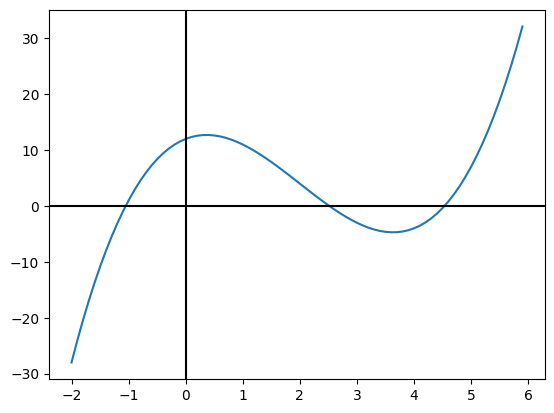

In [54]:
# plot the functions to visualize it

x = np.arange(-2,6,0.1)
y = f(x)

plt.plot(x,y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

In [55]:
# first step: split the boundary into 4 intervals (segments)


## for the sake of teaching 
no_intervals = 4   # number of intervals that we want to split
L = -2
U = 6
k = np.linspace(L, U, 5) ##point L to U  5 sub intervals
print(k)

# so now we have 4 intervals : [-2, 0], [0, 2], [2, 4], [4, 6]

[-2.  0.  2.  4.  6.]


In [56]:
# for each interval, determine whether there is a root (solution of the equation)
# inside the interval or not.  If there is, we guess that the root is at the center
# of the interval

output_intervals = np.empty((0, 2), float)

# test
# for i in np.arange(0,k.size - 1):
for i in range(k.size - 1): ## from k =0 to 3
    print('Interval %d: [%2.2f, %2.2f]' %(i,k[i],k[i+1]))
    # determine whether the interval has a root
    # if f(left_interval_boundary) and f(right_interval_boundary) have different sign
    # then there is a root inside the interval
    if (f(k[i]) * f(k[i+1]) < 0): ##f(x(L)) or f(x(U)) have the same sign or not less than 0 mean there is a root inside the interval
        # Estimate that there is a root at the midpoint between the left boundary 
        # and the right boundary of the interval
        r = (k[i] + k[i+1])/2 ##left boundary + right boundary /2
        print('   found a root at %3.4f' %(r))
        # store this interval into our memory
        output_intervals = np.append(output_intervals, np.array([[k[i],k[i+1]]]), axis=0) ##append 2 dimension array
    #end if
#end for
print('Intervals found:')
print(output_intervals)

Interval 0: [-2.00, 0.00]
   found a root at -1.0000
Interval 1: [0.00, 2.00]
Interval 2: [2.00, 4.00]
   found a root at 3.0000
Interval 3: [4.00, 6.00]
   found a root at 5.0000
Intervals found:
[[-2.  0.]
 [ 2.  4.]
 [ 4.  6.]]


In [57]:
# now we have 3 intervals that contains the roots.
# 

(no_intervals, cols) = output_intervals.shape

# for each interval found, find the root inside the interval

for i in range(no_intervals):
    #split it even further 
    (L,U) = output_intervals[i]
    print('')
    print('Working on interval %d : [%3.4f, %3.4f]' %(i,L,U))
    k = np.linspace(L, U, 5)

    sub_output_intervals = np.empty((0, 2), float)
    
    for i in np.arange(0,k.size - 1):
        print('   Interval %d: [%2.2f, %2.2f]' %(i,k[i],k[i+1]))
        # determine whether the interval has a root
        # if f(left_interval_boundary) and f(right_interval_boundary) have different sign
        # then there is a root inside the interval
        if (f(k[i]) * f(k[i+1]) < 0):
            # Estimate that there is a root at the midpoint between the left boundary 
            # and the right boundary of the interval
            r = (k[i] + k[i+1])/2
            print('      found a root at %3.4f' %(r))
            # store this interval into our memory
            sub_output_intervals = np.append(sub_output_intervals, np.array([[k[i],k[i+1]]]), axis=0)
        #end if
    #end for
    print('')
    print('Interval found: ')
    print(sub_output_intervals)
#end for


Working on interval 0 : [-2.0000, 0.0000]
   Interval 0: [-2.00, -1.50]
   Interval 1: [-1.50, -1.00]
      found a root at -1.2500
   Interval 2: [-1.00, -0.50]
   Interval 3: [-0.50, 0.00]

Interval found: 
[[-1.5 -1. ]]

Working on interval 1 : [2.0000, 4.0000]
   Interval 0: [2.00, 2.50]
   Interval 1: [2.50, 3.00]
      found a root at 2.7500
   Interval 2: [3.00, 3.50]
   Interval 3: [3.50, 4.00]

Interval found: 
[[2.5 3. ]]

Working on interval 2 : [4.0000, 6.0000]
   Interval 0: [4.00, 4.50]
   Interval 1: [4.50, 5.00]
      found a root at 4.7500
   Interval 2: [5.00, 5.50]
   Interval 3: [5.50, 6.00]

Interval found: 
[[4.5 5. ]]


In [58]:
# bisection method

# using the same function f(x) = x^3 - 6x^2 + 4x + 12
# use bisection method to solve for a solution of f(x) = 0

In [61]:
# define the bisection function

def my_bisection(f,xl,xu):
    stop_criterion = 0.005
    max_iteration = 20

    for i in range(0,max_iteration):
        xr = (xl + xu)/2
        prev_xr = xr
        # check the left interval
        print('iteration %d: search in [%3.4f, %3.4f]' %(i, xl, xu))
        if (f(xl) * f(xr) < 0): ##less than 0 mean there is a root inside the interval left sub region
            # there is a root in the left sub-interval
            # remove the right sub-interval
            xu = xr
        else:  # there is a root in the right sub-interval right hand side
            xl = xr
        # end if
        new_xr = (xl + xu)/2
        approx_error = 100 * np.abs((new_xr - prev_xr)/new_xr)
        if (approx_error < stop_criterion):
            break
        #end if
        print('   new search region is [%3.4f, %3.4f], estimated root = [%3.4f], approx_error = %3.4f' %(xl, xu, new_xr, approx_error))
    #end for
    return new_xr
#end function 

In [62]:
print(my_bisection(f,4,5))

##normal interval search k * interval will get total iteration

iteration 0: search in [4.0000, 5.0000]
   new search region is [4.5000, 5.0000], estimated root = [4.7500], approx_error = 5.2632
iteration 1: search in [4.5000, 5.0000]
   new search region is [4.5000, 4.7500], estimated root = [4.6250], approx_error = 2.7027
iteration 2: search in [4.5000, 4.7500]
   new search region is [4.5000, 4.6250], estimated root = [4.5625], approx_error = 1.3699
iteration 3: search in [4.5000, 4.6250]
   new search region is [4.5000, 4.5625], estimated root = [4.5312], approx_error = 0.6897
iteration 4: search in [4.5000, 4.5625]
   new search region is [4.5312, 4.5625], estimated root = [4.5469], approx_error = 0.3436
iteration 5: search in [4.5312, 4.5625]
   new search region is [4.5312, 4.5469], estimated root = [4.5391], approx_error = 0.1721
iteration 6: search in [4.5312, 4.5469]
   new search region is [4.5312, 4.5391], estimated root = [4.5352], approx_error = 0.0861
iteration 7: search in [4.5312, 4.5391]
   new search region is [4.5312, 4.5352], e